In [ ]:
#Simulating Data

import pandas as pd
import numpy as np

n_cust = 1000 #setting the number of customers
np.random.seed(21821)

cust_df = pd.DataFrame({'cust_id': pd.Categorical(range(n_cust))})


#Create variables describing the customers
#Age
cust_df['age'] = np.random.normal(loc=35,scale=5,size=n_cust) #mean, sd, customers
#Credit Score
cust_df['credit_score'] = np.random.normal(loc = 3* cust_df.age + 620,
                                           scale = 50, 
                                           size = n_cust)
#Emaiil
cust_df['email'] = pd.Categorical(np.random.choice(a = ['yes','no'],
                                                   p = [0.8,0.2],
                                                   size = n_cust))
#Distance to Store
cust_df['distance_to_store'] = np.exp(np.random.normal(loc = 2,
                                                       scale = 1.2,
                                                       size = n_cust))

#Simulating online and in store sales
mu = 15 + ((cust_df['email'] == 'yes') * 15 - 0.7 * cust_df['age'])
n = 0.3
prob = np.clip(n / (n + mu), 0.01, 0.99) #to avoid extremes

cust_df['online_visits'] = np.random.negative_binomial( n = 0.3, # success target, success probablity
                                                       p = prob,
                                                       size = n_cust)
cust_df['online_trans'] = np.random.binomial(n = cust_df.online_visits,
                                             p = 0.3,
                                             size = n_cust)
cust_df['online_spend'] = (np.exp(np.random.normal(loc = 3,
                                                   scale = 0.1,
                                                   size = n_cust))
                                                   * cust_df.online_trans)
mu = 3 / np.sqrt(cust_df.distance_to_store)
n = 5

prob = np.clip(n / (n + mu), 0.01, 0.99) 

cust_df['store_trans'] = np.random.negative_binomial(n = n, 
                                                     p = prob,
                                                     size = n_cust)
cust_df['store_spend'] = (np.exp(np.random.normal(loc = 3.5,
                                                  scale = 0.4,
                                                  size = n_cust)) 
                                                  * cust_df.store_trans)

#Simulating Satisfactory Surveys
sat_overall = pd.Series(np.random.normal(loc = 3.1,
                                         scale = 0.7,
                                         size = n_cust))
#setting up two survey responses service and selection
sat_service = np.floor(sat_overall + np.random.normal(loc = 0.5,
                                                      scale = 0.4, 
                                                      size = n_cust))
sat_selection = np.floor(sat_overall + np.random.normal(loc = -0.2,
                                                        scale = 0.6,
                                                        size = n_cust))
#Set a ceiling and floor 
sat_service[sat_service > 5] = 5
sat_service[sat_service < 1] = 1
sat_selection[sat_selection > 5] = 5
sat_selection[sat_selection < 1] = 1

#Simulating no response data

no_response = np.random.binomial(n = 1,
                                 p = cust_df.age / 100,
                                 size = n_cust).astype(bool)
sat_service[no_response] = np.nan
sat_selection[no_response] = np.nan

#Add survey responses to cust_df
cust_df['sat_service'] = sat_service
cust_df['sat_selection'] = sat_selection



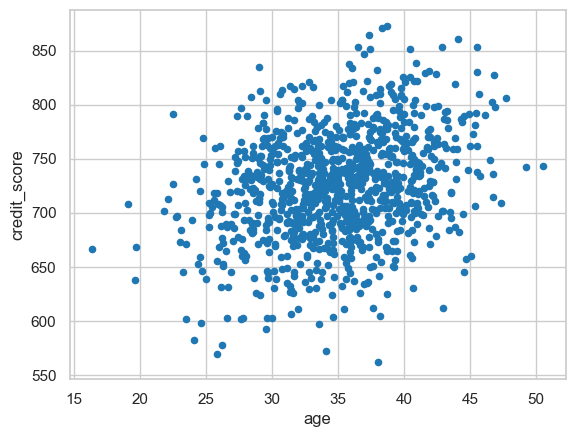

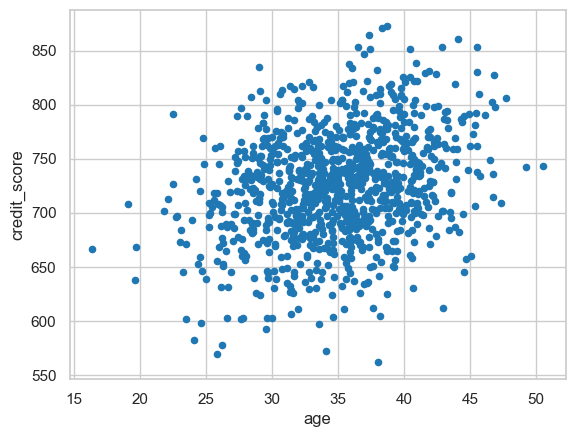

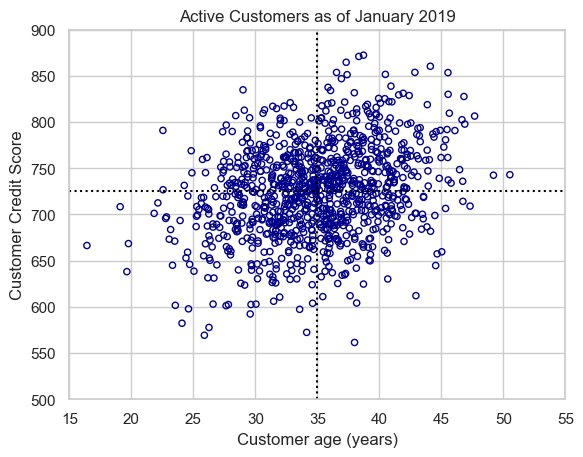

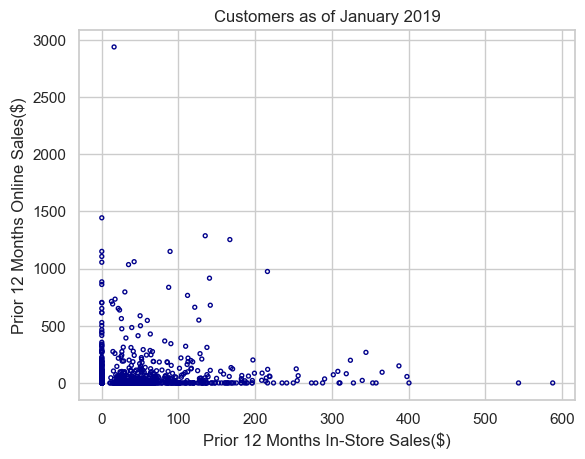

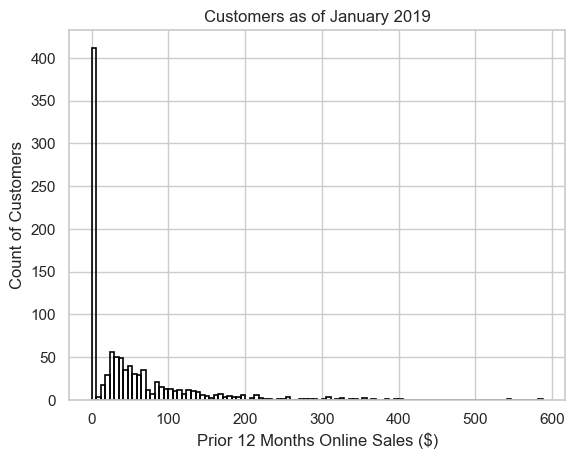

In [24]:
#Exploring associations between variables with Scatter Plots
#Look at the first 5 rows
cust_df.head(5)
#Look at the dtypes of the df
cust_df.dtypes

#creating a basic scatterplot
#relationship between age and credit score
# x is age, y is credit score
cust_df.plot(kind = 'scatter',
             x = 'age',
             y = 'credit_score')

#Using matplotlib/seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

cust_df.plot(kind='scatter', x='age', y='credit_score')

#Making it more informative
cust_df.plot(kind = 'scatter',
             x = 'age',
             y = 'credit_score',
             c = 'none',
             edgecolor = 'darkblue',
             xlim = [15, 55],
             ylim = [500,900])
plt.plot([15,55],
         [cust_df.credit_score.mean(),
          cust_df.credit_score.mean()], # same number twice, the average score
          'k:')
plt.plot([cust_df.age.mean(),cust_df.age.mean()],
         [500, 900],
         'k:')
plt.title('Active Customers as of January 2019')
plt.xlabel('Customer age (years)')
plt.ylabel('Customer Credit Score')
plt.show()

#Marketing Question: 
# Do customers who buy more online buy less in store?
cust_df.plot(kind = 'scatter',
             x = 'store_spend',
             y = 'online_spend',
             c = 'none',
             edgecolor = 'darkblue',
             s = 8)
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 Months In-Store Sales($)')
plt.ylabel('Prior 12 Months Online Sales($)')
plt.show()

#using histogram to look at in-store sales to answer question
cust_df.store_spend.hist(bins = 100,
                         edgecolor = 'k',
                         facecolor = 'none',
                         linewidth = 1.2)
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 Months Online Sales ($)')
plt.ylabel('Count of Customers')
plt.show()

C:\Users\Kyle\AppData\Local\Temp\ipykernel_24696\3985482783.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in cust_df.groupby('email'):
C:\Users\Kyle\AppData\Local\Temp\ipykernel_24696\3985482783.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in cust_df.groupby('email'):


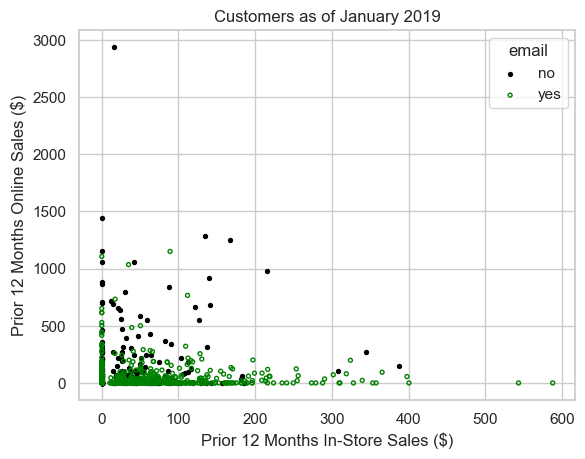

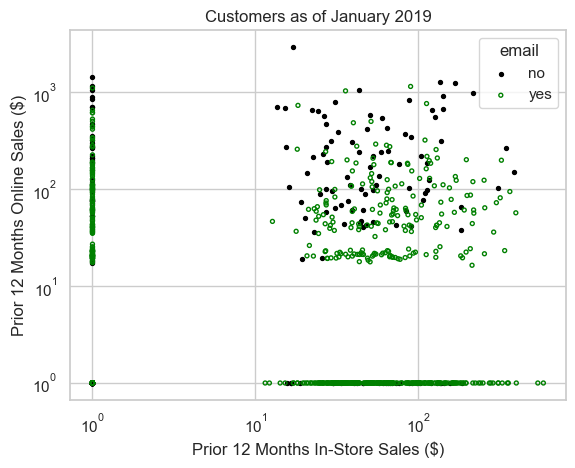

In [ ]:
#Color-Coding Point on a Scatterplot
#Look at email efforts by adding color for email to the scatterplot
edge_mapper = {'yes':'g',
               'no':'k'}
fill_mapper = {'yes':'none',
               'no':'k'}

fig, ax = plt.subplots()
for name, group in cust_df.groupby('email'):
    ax.scatter(x = group.store_spend,
               y = group.online_spend,
               edgecolors = edge_mapper[name],
               c = fill_mapper[name],
               s = 8,
               label = name)
plt.legend(title = 'email')
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 Months In-Store Sales ($)')
plt.ylabel('Prior 12 Months Online Sales ($)')

#Plotting on a log scale to avoid the skew
fig, ax = plt.subplots()
for name, group in cust_df.groupby('email'):
    ax.scatter(x = group.store_spend + 1,
               y = group.online_spend + 1,
               edgecolors = edge_mapper[name],
               c = fill_mapper[name],
               s = 8,
               label = name)
plt.legend(title = 'email')
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 Months In-Store Sales ($)')
plt.ylabel('Prior 12 Months Online Sales ($)')
plt.xscale('log')
plt.yscale('log')
# Shows no relationship between emails and in-store/online purchase


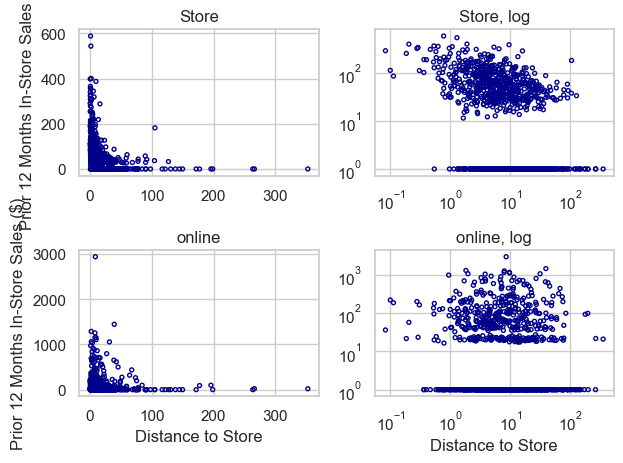

In [29]:
#Combining Plots in a Single Graphics
#Checking distance to store relationship
plt.subplot(221)
plt.scatter(x = cust_df.distance_to_store,
            y = cust_df.store_spend,
            c = 'none',
            edgecolor = 'darkblue',
            s = 8)
plt.title('Store')
plt.ylabel('Prior 12 Months In-Store Sales ($)')

plt.subplot(223)
plt.scatter(x = cust_df.distance_to_store,
            y = cust_df.online_spend,
            c = 'none',
            edgecolor = 'darkblue',
            s = 8)
plt.title('online')
plt.xlabel('Distance to Store')
plt.ylabel('Prior 12 Months In-Store Sales ($)')

plt.subplot(222)
plt.scatter(x = cust_df.distance_to_store,
            y = cust_df.store_spend + 1,
            c = 'none',
            edgecolor = 'darkblue',
            s = 8)
plt.title('Store, log')
plt.xscale('log')
plt.yscale('log')

plt.subplot(224)
plt.scatter(x = cust_df.distance_to_store,
            y = cust_df.online_spend + 1,
            c = 'none',
            edgecolor = 'darkblue',
            s = 8)
plt.title('online, log')
plt.xlabel('Distance to Store')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()

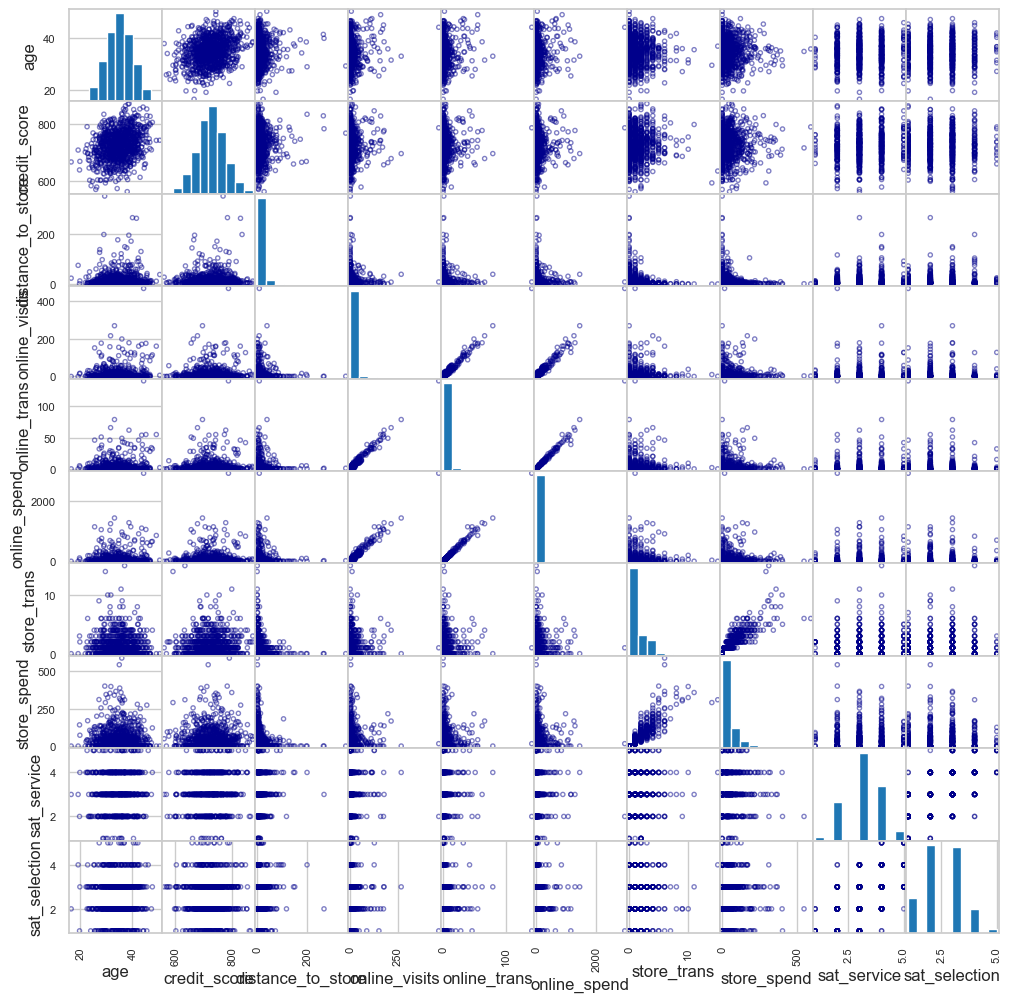

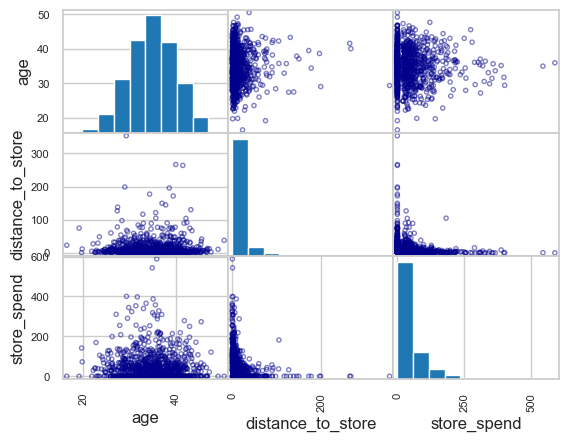

In [ ]:
#Scatterplot Matrix
#Shows all fields to all fields
_ = pd.plotting.scatter_matrix(cust_df, figsize = (12,12), 
                               c = 'none',
                               edgecolors = 'darkblue')

#Looking only at age, distance, store spend
_ = pd.plotting.scatter_matrix(cust_df[['age','distance_to_store',
                                        'store_spend']],
                                        c = 'none', edgecolors = 'darkblue')

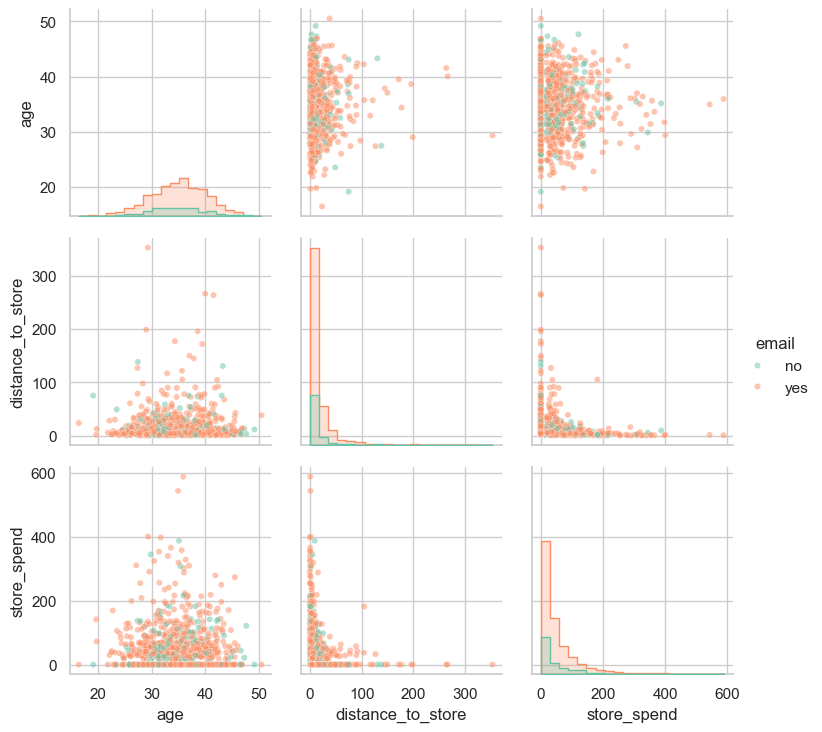

In [41]:
#Using Pair Grid
g = sns.PairGrid(
    cust_df[['age','distance_to_store','store_spend','email']],
    height=2.5,
    hue='email',
    palette='Set2',
    hue_kws={'marker':['o','s']},
    corner=False   # keep diagonal
)

# scatter on both off‐diagonals
g.map_lower(sns.scatterplot, s=20, alpha=0.5)
g.map_upper(sns.scatterplot, s=20, alpha=0.5)

# histograms on *all* diagonals
g.map_diag(sns.histplot, bins=20, element='step')

g.add_legend()

In [ ]:
# Correlation Coefficients
# measures the degree  that two variables very together

#How to compute covariance
np.cov(cust_df.age,cust_df.credit_score)

#Using np.corrcoef(),Pearsons r range between [-1,1]
np.corrcoef(cust_df.age,cust_df.credit_score) #[0,1] pulls the top right number on 2x2 array
#The same way to do it with np.cov
np.cov(cust_df.age,cust_df.credit_score)[0,1]/(cust_df.age.std() *
                                               cust_df.credit_score.std())



np.float64(0.2931725725355577)